<a href="https://colab.research.google.com/github/Mooo49/projects/blob/main/Medical_Insurance_Cost_Prediction_using_Machine_Learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_absolute_error

In [2]:
data=pd.read_csv('/content/insurance.csv')


In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
data['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-9-29af0fe00f94>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


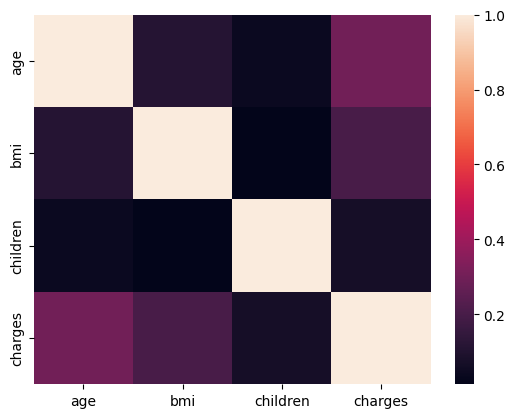

In [9]:
corr=data.corr()
sns.heatmap(corr)
plt.show()

In [111]:
data.replace({'sex':{'male':0,'female':1}},inplace=True)
data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
data.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)


In [112]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [113]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.213004,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,0.843956,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,2.000000,63770.428010


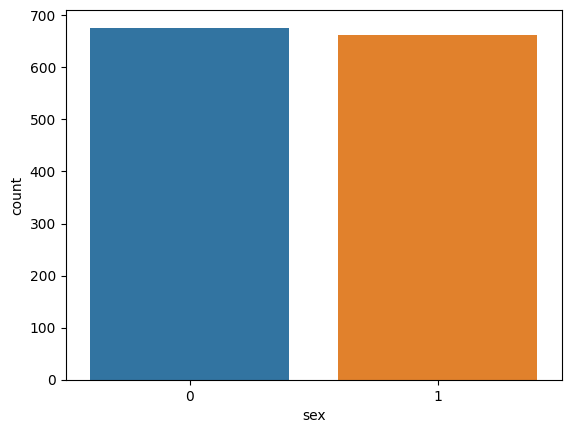

In [114]:
sns.countplot(x='sex',data=data)
plt.show()

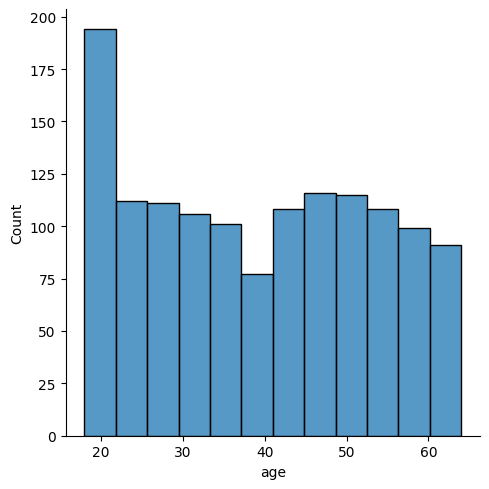

In [115]:
sns.displot(data['age'])
plt.show()

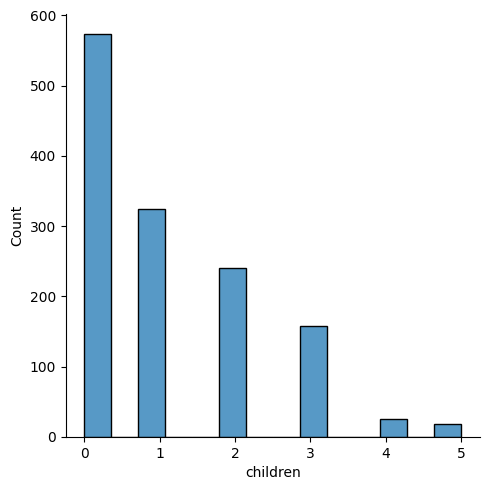

In [116]:
sns.displot(data['children'])
plt.show()

In [117]:
x=data.drop(['charges'],axis=1)
y=data['charges']
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x=s.fit_transform(x)


In [18]:
x

array([[-1.43876426,  1.0105187 , -0.45332   , -0.90861367, -1.97058663,
        -0.25248254],
       [-1.50996545, -0.98959079,  0.5096211 , -0.07876719,  0.5074631 ,
        -1.4378216 ],
       [-0.79795355, -0.98959079,  0.38330685,  1.58092576,  0.5074631 ,
        -1.4378216 ],
       ...,
       [-1.50996545,  1.0105187 ,  1.0148781 , -0.90861367,  0.5074631 ,
        -1.4378216 ],
       [-1.29636188,  1.0105187 , -0.79781341, -0.90861367,  0.5074631 ,
        -0.25248254],
       [ 1.55168573,  1.0105187 , -0.26138796, -0.90861367, -1.97058663,
         0.93285653]])

In [19]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [118]:
xtr,xts,ytr,yts=train_test_split(x,y,train_size=.9,random_state=44)


In [21]:
print(x.shape,xtr.shape,xts.shape)

(1338, 6) (1204, 6) (134, 6)


In [119]:
from sklearn.ensemble import HistGradientBoostingRegressor

H=HistGradientBoostingRegressor(max_depth=44,max_iter=29,max_bins=180).fit(xtr,ytr)



In [120]:
print(H.score(xtr,ytr))
print(H.score(xts,yts))


0.8931984654619975
0.9129885865043837


The best model


In [121]:
yhat=H.predict(xts)
from sklearn.metrics import r2_score
print(r2_score(yts,yhat))


0.9129885865043837


<ipython-input-122-38798ad8307b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1= sns.distplot(yts, hist=False, color="r", label="Actual Value")
<ipython-input-122-38798ad8307b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat, hist=False, label='predicted value', color='b', ax=ax

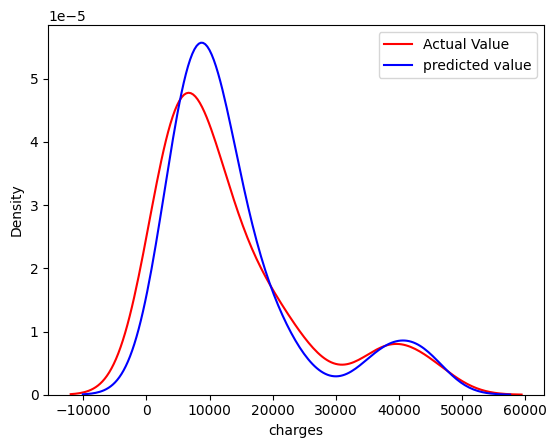

In [122]:
ax1= sns.distplot(yts, hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, label='predicted value', color='b', ax=ax1)

plt.legend()
plt.show()

In [124]:
input=(59,1,27.72,3,1,0)
array=np.asarray(input)
reshape=array.reshape(1,-1)
reshape=s.transform(reshape)

prediction=H.predict(reshape)
print(prediction)


[15892.85752493]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
